<a href="https://colab.research.google.com/github/dyjdlopez/numeth2021/blob/main/Week%203-5%20-%20Roots%20of%20Equations/NuMeth_2_Roots_of_Equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Roots of Equations
$_{\text{©D.J. Lopez | 2021 | Computational Methods for Computer Engineers}}$

Many problems in engineering, the sciences, and cognitive computing is founded on root-finding algorithms. In this module, we will discuss how to algorithmically solve for the roots of non-linear equations (i.e. equations of higher-order and transcendental functions). We will discuss several methods in solving the roots of these equations. The coverage of the module is as follows:
* Review of Roots
* Simple Iteration Method (Brute Force)
* Convergence vs. Divergence
* Newton-Raphson Method
* Bisection Method
* Regula Falsi Method (False Position) 
* Secant Method
* Python Functions for Roots
* Applications of Root-finding

## 2.1 What are roots again?

Several engineering and scientific problems can be formulated in terms of finding the value/s of some parameter or variable $x$ which results in a zero value of some function of that variable (i.e. stability, entropy, equilibirum). Mathematically, this is represented by:

$$F(x)=0 
\\ _{\text{(Eq. 2.1.1)}}$$ 
Whereas $F(x)$ is some function of $x$. These functions could be polynomials:

$$F(x)=a_0+a_1x+a_2x^2+a_3x^3+...+a_1x^n 
\\ _{\text{(Eq. 2.1.2)}}$$
Whereas $a_k$ is a numerical coefficient that could be any real number while $x^k$ is the parameter or variable in the polynomial.

$F(x)$ could also be transcendental functions:

$$F(x)=2e^{x+1}+3e^{(x+1)^2} 
\\ _{\text{(Eq. 2.1.3)}}$$
Transcendental functions are functions that are expressible as a finite combination of the algebraic operations of addition, subtraction, multiplication, division, raising to a power, and extracting a root. They could include but are not limited to trigonometric functions, exponential functions, or logarithmic functions.

### Manual Computation

A traditional practice in engineering mathematics or any traditional mathematics class is to solve for the roots using pen and paper or using a standard equation such as the quadratic formula:

$$x = \frac{-b\pm\sqrt{b^2-4ac}}{2a} 
\\ _{\text{(Eq. 2.1.4)}}$$
We can apply Eq. 2.1.4 to a quadratic equation, for example with:
$$F(x)=x^2+x-2$$
We can derive the roots $x_0=-2$ and $x_1=1$. This satisfies the condition of Eq. 2.1.1, whereupon setting the pre-image of the function to the roots $x_0$ and $x_1$ will yield an image of 0.

We can go further in visualizing the roots and its function using Python.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
### First we define f(x) as a user-defined function
def f(x): return x**2+x-2
### Without doing any programmatic solution we'll set
### x_0 and x_1 with the values we solved.
x0, x1 = -2, 1

In [ ]:
### Next we need to define the range of values for
### the pre-images.
X = np.arange(-5,6,0.1,dtype=float)
print(X)

[-5.00000000e+00 -4.90000000e+00 -4.80000000e+00 -4.70000000e+00
 -4.60000000e+00 -4.50000000e+00 -4.40000000e+00 -4.30000000e+00
 -4.20000000e+00 -4.10000000e+00 -4.00000000e+00 -3.90000000e+00
 -3.80000000e+00 -3.70000000e+00 -3.60000000e+00 -3.50000000e+00
 -3.40000000e+00 -3.30000000e+00 -3.20000000e+00 -3.10000000e+00
 -3.00000000e+00 -2.90000000e+00 -2.80000000e+00 -2.70000000e+00
 -2.60000000e+00 -2.50000000e+00 -2.40000000e+00 -2.30000000e+00
 -2.20000000e+00 -2.10000000e+00 -2.00000000e+00 -1.90000000e+00
 -1.80000000e+00 -1.70000000e+00 -1.60000000e+00 -1.50000000e+00
 -1.40000000e+00 -1.30000000e+00 -1.20000000e+00 -1.10000000e+00
 -1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -1.77635684e-14  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01
  1.00000000e+00  1.10000

In [ ]:
### Let's now determine the images of our function
### We can do this by setting the input of our user-
### defined function with the set of pre-images we
### defined earlier.
Y = g(X)
print(Y)

[-3.10000e+01 -2.70190e+01 -2.32720e+01 -1.97530e+01 -1.64560e+01
 -1.33750e+01 -1.05040e+01 -7.83700e+00 -5.36800e+00 -3.09100e+00
 -1.00000e+00  9.11000e-01  2.64800e+00  4.21700e+00  5.62400e+00
  6.87500e+00  7.97600e+00  8.93300e+00  9.75200e+00  1.04390e+01
  1.10000e+01  1.14410e+01  1.17680e+01  1.19870e+01  1.21040e+01
  1.21250e+01  1.20560e+01  1.19030e+01  1.16720e+01  1.13690e+01
  1.10000e+01  1.05710e+01  1.00880e+01  9.55700e+00  8.98400e+00
  8.37500e+00  7.73600e+00  7.07300e+00  6.39200e+00  5.69900e+00
  5.00000e+00  4.30100e+00  3.60800e+00  2.92700e+00  2.26400e+00
  1.62500e+00  1.01600e+00  4.43000e-01 -8.80000e-02 -5.71000e-01
 -1.00000e+00 -1.36900e+00 -1.67200e+00 -1.90300e+00 -2.05600e+00
 -2.12500e+00 -2.10400e+00 -1.98700e+00 -1.76800e+00 -1.44100e+00
 -1.00000e+00 -4.39000e-01  2.48000e-01  1.06700e+00  2.02400e+00
  3.12500e+00  4.37600e+00  5.78300e+00  7.35200e+00  9.08900e+00
  1.10000e+01  1.30910e+01  1.53680e+01  1.78370e+01  2.05040e+01
  2.33750e

No handles with labels found to put in legend.


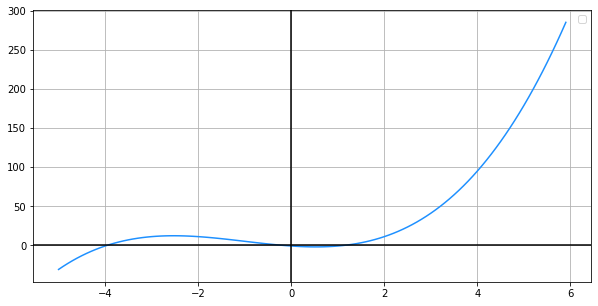

In [ ]:
### Now let's plot the images against the pre-images
plt.figure(figsize=(10,5))
plt.plot(X,Y,color='dodgerblue')
### Let's show the x and y axes of the graph
plt.axhline(color='black')
plt.axvline(color='black')
plt.grid()
### Now let's plot the roots of the equation
# plt.scatter([x0,x1],[0,0], c='red', label='roots')

plt.legend()
plt.show()

#### **Activity 2.1** 
1. Identify **two more polynomials** preferably **orders higher than 2** and **two transcendental functions**. Write them in **LaTex**.
2. Plot their graphs you may choose your own set of pre-images.
3. Manually solve for their roots and plot them along the graph of the equation.

Use the space the space below for your answers.

*Space for your equations in LaTeX*

In [ ]:
## Space for your code. You can add more cells if you want.

### Computational Methods
In modern mathematics, especially for the practice of Physics, Computer Science, and Computer Engineering, we will harness the power of computers in solving for problems such as root-finding. For the rest of this course, we will use Python in applying numerical methods.

Computational methods or techniques translate the traditional mathematical, statistical, and scientific models or equations to computer programming aiming to increse the efficiency and applicability of these models to actual use. Understanding and practicing these methods will eventually lead to the fields e.g. Computational Physics and Artificial Intelligence. The famous programming languages used by scientists and engineers in practicing computational methods include:
* Python
* MATLab
* R
* Fortran
* F#
* C++ 

## 2.2 Simple Iteration Method (Brute Force)
The first method that we will use in applying computational methods is through iterative methods. These methods are called **iterative** because the algorithms that will be designed will utilize iterations or looping statements.

The easiest way to start with these iterative methods is through the *brute force* method. It's called brute force because we will use a linear search for finding the roots of equations. Brute force are rarely used in deployment of computational models because they are inefficient for higher degree equations.

### 2.2.1 Brute Force Algorithm ($F(x)=0$)
1. Set the function $f(x)$.
2. Set the number of iterations
3. Set a seed value or a starting guess as $h$. Usually zero.
4. Apply the current $h$ to $f(x)$.
5. Check whether the image produced is 0. (Eq. 2.1.1)
6. If $f(h) \not\approx 0$, then repeat again from (4).
7. If $f(h) \approx 0$, then $x_{root}=h$.



In [ ]:
## 1
def f(x): return x**2+x-2

$$x^3+3x^2-4x-1 \\ x_1 = −0.21718 \\ x_2=1.16601\\x_3 = −3.94883$$


In [ ]:
def g(x): return x**3+3*x**2-4*x-1

In [ ]:
## Finding one root
epochs = 50
h = -10
x_roots = []
for epoch in range(epochs):
  x_guess = f(h)
  print(x_guess)
  if x_guess == 0:
    x_roots.append(h)
    break
  else:
    h+=1
print(f"The root is: {x_roots}, found at epoch {epoch}")

88
70
54
40
28
18
10
4
0
The root is: [-2], found at epoch 8


In [ ]:
## Finding n number of roots
epochs = 100000
n_roots = 3
x_roots = []
end_epoch = 0
h = -5

for epoch in range(epochs):
  print(g(h))
  if np.allclose(0,g(h),1e-03):
    x_roots.append(h)
    end_epoch = epoch
    if len(x_roots)==n_roots:
      break
  h+=1e-4

print(f"The root is: {x_roots}, found at epoch {end_epoch+1}")

### 2.2.2 Brute Force Algorithm (In terms of X)
1. Rearrange where the a single order of x is on one side of the equation.
$$x_1=2-x^2\\x_2=\sqrt{2-x}$$
2. Set/Assume initial value of root. Usually 0.
3. Calculate the new value of $x$ as $x'$ by substituting the current value of $x$ to the equation in (1).
4. If $x' \approx x$ then $x'$ is a root.
5. If $x' \not\approx x$ then $x'$ is not a root. Repeat from (3).

In [ ]:
# def f(x): return x**2+x-2
def f1(x): return 2-x**2
def f2(x): return np.sqrt(2-x)

In [ ]:
## Solving for a single root
epochs = 100
x=0
root = None
for epoch in range(epochs):
  x_prime = f2(x)
  if np.allclose(x,x_prime):
    root = x
    break
  x = x_prime
print("The root is {:.2f} found after {} epochs".format(root,epoch))

The root is 1.00 found after 18 epochs


In [ ]:
## Solving for n number of roots
funcs = [f1, f2]
n_roots = len(funcs)
roots = []
epochs = 100
for func in funcs:
  x=0
  for epoch in range(epochs):
    x_prime = func(x)
    if np.allclose(x, x_prime):
      roots.insert(len(roots), x)
      break
    x = x_prime
print(roots)

[-2, 0.9999965404502678]


## 2.3 Convergent and Divergent Algorithms
It is important to identify success of your algorithms. One way to see whether a computational method is solving a problem i.e. finding roots or optimizing equations is to determine if the solution you are developing is converging or diverging to the answer.

**Convergence**

When we talk about the convergence of a solution, it pertains to the gradient of similarity between the current solution and the theoretical solution. If this were repsented in a graph, it would look like two similar graphs joining together after several epochs or iterations (Fig. 2.1). 

**Divergence**

Divergence would then pertain to the event in which the answers that you are producing and the theoretical solutions do not meet each other or they split away from each other (Fig. 2.2).

In [ ]:
def k(x): return (2*x**3+0.5*x+20)**0.25

In [ ]:
x = 0
epochs = 10
history_x = []
history_x_prime = []
for epoch in range(epochs):
  x_prime = k(x)
  history_x.append(x)
  history_x_prime.append(x_prime)
  if np.allclose(x, x_prime, 1.0e-6):
    break
  x = x_prime

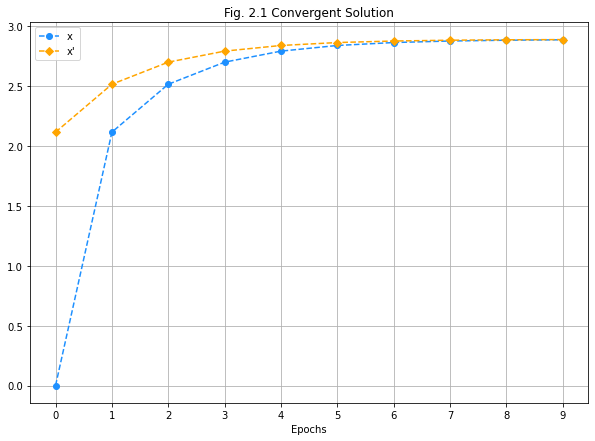

In [ ]:
history_x = history_x[0:]
history_x_prime = history_x_prime[0:]
x_range = np.arange(len(history_x),dtype=int)

plt.figure(figsize=(10,7))
plt.plot(x_range, history_x, 'o--',color='dodgerblue', label='x')
plt.plot(x_range, history_x_prime,'D--', color='orange', label='x\'')

plt.title("Fig. 2.1 Convergent Solution")
plt.xlabel("Epochs")
plt.xticks(np.arange(min(x_range), max(x_range)+1, 1.0))
plt.legend()
plt.grid()
plt.show()

In [ ]:
def l(x): return np.sin(x)+np.cos(x**2)

In [ ]:
x = 0
epochs = 10
history_x = []
history_x_prime = []
for epoch in range(epochs):
  x_prime = l(x)
  history_x.append(x)
  history_x_prime.append(x_prime)
  if np.allclose(x, x_prime, 1.0e-6):
    break
  x = x_prime

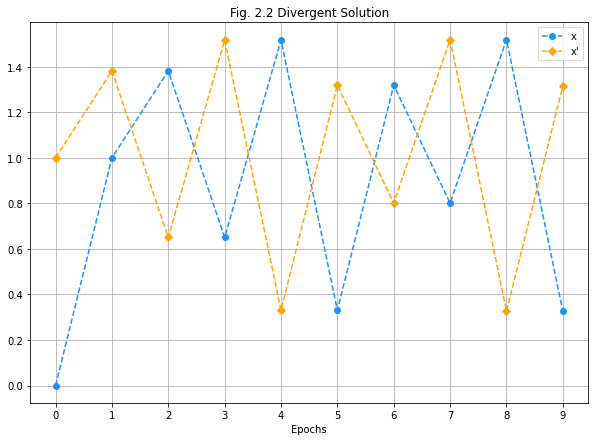

In [ ]:
history_x = history_x[0:]
history_x_prime = history_x_prime[0:]
x_range = np.arange(len(history_x),dtype=int)

plt.figure(figsize=(10,7))
plt.plot(x_range, history_x, 'o--',color='dodgerblue', label='x')
plt.plot(x_range, history_x_prime,'D--', color='orange', label='x\'')

plt.title("Fig. 2.2 Divergent Solution")
plt.xlabel("Epochs")
plt.xticks(np.arange(min(x_range), max(x_range)+1, 1.0))
plt.legend()
plt.grid()
plt.show()

## 2.4 Newton-Raphson Method
The Newton-Raphson Method is another iterative computational method in solving for the roots of equations. Unlike the brute-force method, the Newton-Raphson method uses the updated function: 
$$x'=x- \frac{f(x)}{f'(x)}\\ _{\text{(Eq. 2.4.1)}}$$
Whereas $x'$ is the guessed root, $f(x)$ is the equation we are solving, and $f'(x)$ is the derivative of that function. This method is more commonly used compared to the brute-force method since it converges faster.

Let's try to use this sample equation for our implementation of the Newton-Raphson method:
$$f(x)=2x^2-5x+3=0$$
Whereas its derivative is $f'(x) = 4x-5$.

In [ ]:
def f(x): return 2*x**2 - 5*x + 3
def f_prime(x): return 4*x-5

In [ ]:
## Single Root
epochs = 100
x = 0
root = None
for epoch in range(epochs):
  x_prime = x - (f(x)/f_prime(x))
  if np.allclose(x, x_prime):
    root = x
    break
  x = x_prime
print(root, epoch)

0.9999988410873017 5


In [ ]:
## N roots
epochs = 100
x_inits = np.arange(0,5)
roots = []
for x_init in x_inits:
  x = x_init
  for epoch in range(epochs):
    x_prime = x - (f(x)/f_prime(x))
    if np.allclose(x, x_prime):
      roots.append(x)
      break
    x = x_prime
np_roots = np.round(roots,3)
np_roots = np.unique(np_roots)
np_roots

array([1. , 1.5])

Now let's try a more complicated equation:
$$g(x)=x^2+cos^2(x)-4x \\ g'(x)=2x-2cos(x)sin(x)-4$$

In [ ]:
def g(x): return x**2 + np.cos(x)**2-4*x
def g_prime(x): return 2*x + 2*np.cos(x)*np.sin(x)-4

In [ ]:
## Solving for N number of roots
epochs = 100
x_inits = np.arange(0,5)
roots = []
for x_init in x_inits:
  x = x_init
  for epoch in range(epochs):
    x_prime = x - (g(x)/g_prime(x))
    if np.allclose(x, x_prime):
      roots.append(x)
      break
    x = x_prime
np_roots = np.array(roots)
np_roots = np.round(np_roots,3)
np_roots = np.unique(np_roots)
np_roots

array([0.25, 3.85])

## 2.5 Bisection Method
The bisection method is founded on the idea that the root of a given equation is a point corssing the x-axis. The Bisection Method, also called the interval halving method, the binary search method, or the dichotomy method is based on the Bolzano’s theorem for continuous functions

> *Theorem (Bolzano) : If the function f(x) is continuous in [a, b] and f(a)f(b) < 0 (i.e. f(x) has opposite signs signs at a and b)
then a value c ∈ (a, b) exists such that f(c) = 0.*

![image](https://x-engineer.org/wp-content/uploads/2016/11/The-Bisection-Method-animation.gif?c4395d&c4395d)

**Algorithm**:
1. Set the assumed interval $\iota$ wherein the root is expected.
2. Calculate values of $y_1$ and $y_2$ given $\iota_{1}$ and $\iota_{2}$.
3. Check whether the signs of $y$ are different (Bolzano's Theorem).
4. If the signs of $y_1$ and $y_2$ are the same halt.
5. If the signs of $y_1$ and $y_2$ are opposite, calculate the $x$ in the half of the interval.
6. Check for the sign difference of $y_1$ and $y_2$ in the first-half interval (Bolzano's Theorem).
7. If signs are opposite, let $\iota_{1}$ and $\iota_{2}$ be the new limits of the first-half interval.
8. If signs are the same, let $\iota_{1}$ and $\iota_{2}$ be the new limits of the second-half interval.
9. If $y_1$ and $y_2$ approach 0, halt.
10. Else repeat from 5.


Example:
$$2x^2-5x+3=0 \\ y = 2x^2-5x+3$$
Ground truth: $x_1=1.5, x_2=1$

In [ ]:
# Single Root

def f(x): return 2*x**2 - 5*x + 3
i1, i2 = 1.1, 2
y1, y2 = f(i1), f(i2)
root = None
end_bisect = 0
if np.sign(y1) == np.sign(y2):
  print("Root cannot be found in the given interval")
else:
  for bisect in range(0,100):
    midp = np.mean([i1,i2])
    y_mid = f(midp)
    y1 = f(i1)
    if np.allclose(0,y1, 1e-06):
      root = i1
      end_bisect = bisect
      break
    if np.sign(y1) != np.sign(y_mid): #root is in first-half interval
      i2 = midp
    else: #root is in second-half interval
      i1 = midp 

  print("The root is {:.04f}, found at {} bisections".format(root, end_bisect))  

The root is 1.5000, found at 27 bisections


But how to do this for multiple roots?

## 2.6 Regula Falsi (False Position) Method

Regula falsi is similar to the bisection method. The method is the trial and error technique of using test ("false") values for the variable and then adjusting the test value according to the outcome [[2]](https://iq.opengenus.org/regula-falsi-method/).

![image](https://iq.opengenus.org/content/images/2019/09/regula.gif)

An approximation can be obtained finding the point $(c, 0)$ where the secant line $L$ joining the points $(a, f(a))$ and $(b, f (b))$ crosses the x-axis (see the image below). To find the value $c$, we write down two versions of the slope m of the line $L$:

![image](https://iq.opengenus.org/content/images/2019/09/rf-2.png)

We first use points $(a, f (a))$ and $(b, f (b))$ to get the slope of $L$:
$$m_{La} = \frac{f(b)-f(a)}{b-a} \\ _{\text{(Eq. 2.6.1)}}$$
Then using the points $(c, 0)$ and $(b, f (b))$ to obtain the slope of a section $L$ below the x-axis as:
$$m_{Lb} = \frac{0-f(b)}{c-b}\\ _{\text{(Eq. 2.6.2)}}$$
We then solve for the false root $c$ by equating Eq. 2.6.1 and Eq. 2.6.2 with respect to the idea that $m_{La}$ should be consistent with the slope of $m_{Lb}$ since they are sections of the same line $L$:
$$\frac{f(b)-f(a)}{b-a} = \frac{0-f(b)}{c-b}\\ _{\text{(Eq. 2.6.3)}}\\ c = b - \frac{f(b)\cdot(b-a)}{f(b)-f(a)}\\ _{\text{(Eq. 2.6.4)}}
$$

**Algorithm**:
1. Set the assumed interval $a$ and $b$ wherein the root is expected.
2. Calculate values of $y_1$ and $y_2$ given $a$ and $b$.
3. Check whether the signs of $y$ are different (Bolzano's Theorem).
4. If the signs are the same, halt.
5. Calculate the value of $c$ and $f(c)$ (Eq. 2.6.4)
6. If $f(c)$ approaches 0, halt and obtain the root.
7. If $f(c)$ and $f(a)$ have opposite signs, set $b=c$ and $y_2=f(c)$ 
8. If $f(c)$ and $f(a)$ have same signs, set $a=c$ and $y_1=f(c)$
9. Repeat from 5.

In [ ]:
def f(x): return 2*x**2 - 5*x + 3
a,b = 1.1,3
y1, y2 = f(a), f(b)
root = None 
pos = 0
if np.allclose(0,y1): root = a
elif np.allclose(0,y2): root = b
elif np.sign(y1) == np.sign(y2):
  print("No root here")
else:
  for pos in range(0,100):
    c = b - (f(b)*(b-a))/(f(b)-f(a)) ##false root
    if np.allclose(0,f(c), 1e-06):
      root = c
      break
    if np.sign(f(a)) != np.sign(f(c)): b,y2 = c,f(c)
    else: a,y1 = c,f(c) 

print("The root is {:.04f}, found at {} false position".format(root, pos))
  

The root is 1.5000, found at 66 false position


Now try for yourself in solving multiple roots

## 2.7 Secant Method

The idea underlying the secant method is the same as the one underlying Newton's method: to find an approximate zero of a function $f(x)$ we find instead a zero for a linear function $F(x)$ that corresponds to a "best straight line of fit" to $f(x)$ [[3]](https://math.okstate.edu/people/binegar/4513-F98/4513-l08.pdf). 


The secant method is also similar to regula falsi method except instead of dividing each interval by choosing the midpoint the secant method divides each interval by the secant line connecting the endpoints. The secant method always converges to a root of $f(x)=0$ provided that $f(x)$ is continuous on $[x_1,x_2]$ and $f(x_1)f(x_2)<0$ [[4]](https://www.math.ubc.ca/~pwalls/math-python/roots-optimization/secant/). 





Since a secant line is defined using two points on the graph of $f(x)$, as opposed to a tangent line that requires information at only one point on the graph, it is necessary to choose two initial iterates $x_0$ and $x_1$. Then, as in Newton’s method, the next iterate $x_2$ is then obtained by computing the x-value at which the secant line passing through the points $(x_0, f(x_0))$ and $(x_1, f(x_1))$ has a y-coordinate of zero [[5]](https://iq.opengenus.org/secant-method/). This yields the equation:
$$\frac{f(x_1)-f(x_0)}{x_1-x_0}\cdot(x_2-x_1)+f(x_1)=0 \\ _{\text{(Eq. 2.7.1)}} \\

x_2 = x_1 - \frac{f(x_1)\cdot(x_1-x_0)}{f(x_1)-f(x_0)} \\ _{\text{(Eq. 2.7.2)}}
$$

You can observe that Eq. 2.7.2 is similar to Eq. 2.6.4 from Regula falsi, but unlike in the regula falsi method do not check whether the inital two estimates statisfy the condition that function sign at both points should be opposite.

![image](https://iq.opengenus.org/content/images/2019/09/Secantaa.gif)

**Algorithm**:
1. Set initial guesses for $x_0$ and $x_1$.
2. Calculate for $x_2$ using Eq. 2.7.2
3. If $|x_2-x_1| \approx 0$, halt and retrieve root.
4. Else $x_0 = x_1$ and $x_1 = x_2$
5. Repeat from 2 


In [ ]:
# Single Root
def f(x): return 2*x**2 - 5*x + 3
a, b = 0, 1.1
epochs = 100
root = None
for epoch in range(epochs):
  c = b - (f(b)*(b-a))/(f(b)-f(a))
  if np.allclose(b,c): 
    root = c
    break
  else:
    a,b = b,c
print("The root is {:.04f}, found at {} epochs".format(root, epoch))

The root is 1.0000, found at 5 epochs


Try creating a method for finding multiple roots

## 2.8 Using the NumPy and SciPy



### 2.8.1 `numpy.roots` 
Unlike the functions that we are developing in which we have functions as parameters, the `numpy.roots` accepts an array of numerical coefficients. The values in the rank-1 array $p$ are coefficients of a polynomial [[6]](https://numpy.org/doc/stable/reference/generated/numpy.roots.html). If the length of $p$ is $n+1$ then the polynomial is described by:
$$p_0x^n + p_1x^{n-1} + ... + p_{n-1}*x + p_n$$
The algorithm relies on computing the eigenvalues of the companion matrix [[7]](http://www.cse.zju.edu.cn/eclass/attachments/2015-10/01-1446086008-145421.pdf).

So given the sample polynomial:
$$y = 2x^2-5x+3$$

In [ ]:
coeff = [2,-5,3]
roots = np.roots(coeff)
print(roots)

[1.5 1. ]


### 2.8.2 `scipy.optimize.newton`
Scientific Python or SciPy [[8]](https://docs.scipy.org/doc/scipy/reference/index.html) is another package for computational methods using Python. SciPy has a `optimize` module that includes several root-finding algorithms. One of such is the `newton` function that implements the Newton-Raphson method. The `newton` method finds a zero of the function func given a nearby starting point `x0`. The Newton-Raphson method is used if the derivative `fprime` of `func` is provided, otherwise the secant method is used. If the second order derivative `fprime2` of `func` is also provided, then Halley’s / Newton-Raphson method is used. If `x0` is a sequence with more than one item, then newton returns an array, and `func` must be vectorized and return a sequence or array of the same shape as its first argument. If `fprime` or `fprime2` is given, then its return must also have the same shape [[9]](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html).

**Syntax**:
> `scipy.optimize.newton(func, x0, fprime=None, args=(), tol=1.48e-08, maxiter=50, fprime2=None, x1=None, rtol=0.0, full_output=False, disp=True)`

Let's try to implement `scipy.optimize.newton` using the same sample polynomial at 2.8.1:

In [1]:
from scipy import optimize as opt

In [5]:
func = lambda x : 2*x**2 - 5*x + 3
roots_newton = opt.newton(func, 0)
roots_newton

0.9999999999999999

### 2.8.3 `scipy.optmize.bisect`

The `bisect` function is another root-finding function in the `scipy.optimize` module in which it finds the root of a function within an interval using the bisection method. Basic bisection routine to find a zero of the function f between the arguments `a` and `b`. `f(a)` and `f(b)` cannot have the same signs [[10]](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html#scipy.optimize.bisect).

**Syntax**
> `scipy.optimize.bisect(f, a, b, args=(), xtol=2e-12, rtol=8.881784197001252e-16, maxiter=100, full_output=False, disp=True)`

Let's use the 2.8.2 sample function: 

In [6]:
roots_bisect = opt.bisect(func,0,1.1)
roots_bisect

1.000000000000091

## 2.9 Practical Applications of Root-Finding Algorithms (Optimization)
As featured in our discussion at the start of this module, root-finding algorithms are widely used in optimization problems. Optimization techniques is a core topic in the higher engineering mathematics and design, operations, economics, quantum mechanics, and especially in cognitive computing. 

## References
[1] J.R. Hauser. (2009) *Roots of Nonlinear Equations.* Engineering Models. Springer, Dordrecht. https://doi.org/10.1007/978-1-4020-9920-5_3

[2] E. Chopra. (2019) *Regula Falsi Method for finding root of a polynomial*. OpenGenus Foundation. https://iq.opengenus.org/regula-falsi-method/

[3] B. Binegar. (1998) *Secant Method*. Fall Lecture onn Introduction to Numerical Analysis. Oklahoma State University. https://math.okstate.edu/people/binegar/4513-F98/4513-l08.pdf

[4] P. Walls (2019) *Roots and Optimization: Secant Method*. Mathematical Python. https://www.math.ubc.ca/~pwalls/math-python/roots-optimization/secant/

[5] E. Chopra. (2019) *Secant Method to find root of any function*. OpenGenus Foundation. https://iq.opengenus.org/secant-method/

[6] SciPy Community. (2021) *NumPy Roots*. NumPy Documentation. https://numpy.org/doc/stable/reference/generated/numpy.roots.html

[7] R. A. Horn & C. R. Johnson, Matrix Analysis. Cambridge, UK: Cambridge University Press, 1999, pp. 146-7. http://www.cse.zju.edu.cn/eclass/attachments/2015-10/01-1446086008-145421.pdf

[8] SciPy Community. (2021) *SciPy*. NumPy Documentation. https://docs.scipy.org/doc/scipy/reference/index.html

[9] SciPy Community. (2021) *scipy.optimize.newton*. NumPy Documentation. https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html

[10] SciPy Community. (2021) *scipy.optimize.bisect*. NumPy Documentation. https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html